In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

## my own function that gets the data
from Pi_GetData_fcn import GetData as GetData
from Pi_GetPiOverview_fcn import GetPiOverview as GetPiOverview


In [2]:
# define function
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same')/w

In [25]:
## color blind colors
cc = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

my_colors = {'bb': cc["blue"], 'anc': cc["green"], 'bn50': cc["red"], 'bn5': cc["orange"], 'A00': cc["purple"],
             "M00": cc["pink"], "iso": cc["brown"], "bleach": "#17BECF",
            0: "#e5e5e5ff", 1: "#999999ff", 15: "#1873ccff"}


## What you need:
* python functions:
  * **Pi_GetData_fcn.py**
  * **Pi_GetPiOverview_fcn.py**
  * data: 

Comment: This script also handles theta and D diversity measures the same way! In general we call the quantity **div**, as in diversity and it can be pi, theta or D

## What this script does:

- it loads diversity data with the **Pi_GetData_fcn.py** function 
  - in that function it:
      1. shifts the window position so that it applies to the whole genome and not chromosome position
      2. all samples are joined in one data frame
      3. there is df_shiftRaw with the raw data for fraction (%) of window covered and diversity (e.g. pi diversity) per window
      4. there is also df_shiftNorm in which for each window **div** is multiplied with frac
 - Then, calculate genome-wide **div** values either with the raw data or normalised data, with **Pi_GetPiOverview_fcn.py**
    1. **div**: uses the raw data, average ove all **div** values
    2. **div**Weight: using the df_shiftNorm data - it evaluates: 
$$\text{div}_{weight} = \frac{\sum_{i=1}^{n}\text{div}_{i}\cdot f_{i}}{\sum_{i=1}^{n}f_{i}}$$
      ( before, I had this, but I kicked it out: divNormwNaN: the final value is multiplied with the fraction of windows that are not nan)

![dataStructure](BioInfo.png)

In [3]:
# read in data to panda
InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/theta_July24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/D_July24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_default/"
files=glob.glob(InPath+"*.pi")

outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
chromosomes_length = [15072434, 15279421, 13783801, 17493829, 20924180, 17718942, 13794]
chromosomes_end = [15072434, 30351855, 44135656, 61629485, 82553665, 100272607, 100286401]

files

['/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/VU_bn5_15_2_Sanger_maxCov500_fracCov_0.01.pi',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/VU_bb_15_3_Sanger_maxCov500_fracCov_0.01.pi',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/RUG_bb_15_5_Sanger_maxCov500_fracCov_0.01.pi',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/NIOO_bb_15_4_Sanger_maxCov500_fracCov_0.01.pi',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May

In [4]:
## use the function to get the data 
samName_collect, df_shiftRaw, df_shiftNorm, collect_sumofWeights, collect_NanNum = GetData(files, chromosomes, chromosomes_end,False)
overview = GetPiOverview(samName_collect, df_shiftRaw, df_shiftNorm, collect_sumofWeights, collect_NanNum)
overview["NumNaNWindows"] =  collect_NanNum

#overview
#df_shiftRaw
overview


,ID,institution,treatment,inst_treat,week,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows
div_VU_bn5_15_2,VU_bn5_15_2,VU,bn5,VU_bn5,15,2,0.001644,0.003140,0.001630,0.003092,3.0
div_VU_bb_15_3,VU_bb_15_3,VU,bb,VU_bb,15,3,0.001714,0.003113,0.001700,0.003064,2.0
div_RUG_bb_15_5,RUG_bb_15_5,RUG,bb,RUG_bb,15,5,0.001747,0.003159,0.001736,0.003119,1.0
div_NIOO_bb_15_4,NIOO_bb_15_4,NIOO,bb,NIOO_bb,15,4,0.001727,0.003063,0.001716,0.003024,1.0
div_WUR_bb_15_3,WUR_bb_15_3,WUR,bb,WUR_bb,15,3,0.001683,0.003163,0.001673,0.003128,1.0
div_RUG_bb_1_5,RUG_bb_1_5,RUG,bb,RUG_bb,1,5,0.001703,0.003163,0.001691,0.003122,1.0
div_RUG_bb_1_2,RUG_bb_1_2,RUG,bb,RUG_bb,1,2,0.001718,0.003187,0.001705,0.003144,1.0
div_UVA_anc_0_3,UVA_anc_0_3,UVA,anc,UVA_anc,0,3,0.001751,0.003258,0.001738,0.003215,1.0
div_VU_bb_15_5,VU_bb_15_5,VU,bb,VU_bb,15,5,0.001737,0.003156,0.001722,0.003104,1.0
div_RUG_bb_15_3,RUG_bb_15_3,RUG,bb,RUG_bb,15,3,0.001738,0.003213,0.001724,0.003162,3.0


In [23]:

#the fields that we are interested in: 
samName_collect_frac = ["frac_"+s for s in samName_collect]
threshold = 0.6

df_shiftRaw_threshold = df_shiftRaw.copy()

print(df_shiftRaw_threshold.isna().sum().sum())


for i in range(len(samName_collect)):
    column = df_shiftRaw_threshold[samName_collect_frac[i]].values

    #print(np.sum(np.isnan(column)))
    column_new = np.where(column<= threshold, np.nan, column)
    #print(np.sum(np.isnan(column_new)))
    df_shiftRaw_threshold[samName_collect_frac[i]] = column_new


print(df_shiftRaw_threshold.isna().sum().sum())
df_shiftRaw_threshold
overview

206
6580


,ID,institution,treatment,inst_treat,week,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows
div_VU_bn5_15_2,VU_bn5_15_2,VU,bn5,VU_bn5,15,2,0.001644,0.003140,0.001630,0.003092,3.0
div_VU_bb_15_3,VU_bb_15_3,VU,bb,VU_bb,15,3,0.001714,0.003113,0.001700,0.003064,2.0
div_RUG_bb_15_5,RUG_bb_15_5,RUG,bb,RUG_bb,15,5,0.001747,0.003159,0.001736,0.003119,1.0
div_NIOO_bb_15_4,NIOO_bb_15_4,NIOO,bb,NIOO_bb,15,4,0.001727,0.003063,0.001716,0.003024,1.0
div_WUR_bb_15_3,WUR_bb_15_3,WUR,bb,WUR_bb,15,3,0.001683,0.003163,0.001673,0.003128,1.0
div_RUG_bb_1_5,RUG_bb_1_5,RUG,bb,RUG_bb,1,5,0.001703,0.003163,0.001691,0.003122,1.0
div_RUG_bb_1_2,RUG_bb_1_2,RUG,bb,RUG_bb,1,2,0.001718,0.003187,0.001705,0.003144,1.0
div_UVA_anc_0_3,UVA_anc_0_3,UVA,anc,UVA_anc,0,3,0.001751,0.003258,0.001738,0.003215,1.0
div_VU_bb_15_5,VU_bb_15_5,VU,bb,VU_bb,15,5,0.001737,0.003156,0.001722,0.003104,1.0
div_RUG_bb_15_3,RUG_bb_15_3,RUG,bb,RUG_bb,15,3,0.001738,0.003213,0.001724,0.003162,3.0


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[1.41672970e-05 1.37824836e-05 1.17391231e-05 1.17267431e-05
 1.00034922e-05 1.18553190e-05 1.24082921e-05 1.26139327e-05
 1.49509279e-05 1.45160778e-05 1.36943300e-05 1.96990842e-05
 1.30668347e-05 2.18158827e-05 1.27794556e-05 1.18135805e-05
 1.27649004e-05 4.21352565e-05 1.64897047e-05 1.21162170e-04
 1.24071980e-05 6.44176895e-05 1.13735670e-05 3.39153960e-05
 1.08621735e-05 1.25852194e-05 1.71937104e-05 1.08936789e-05
 1.286

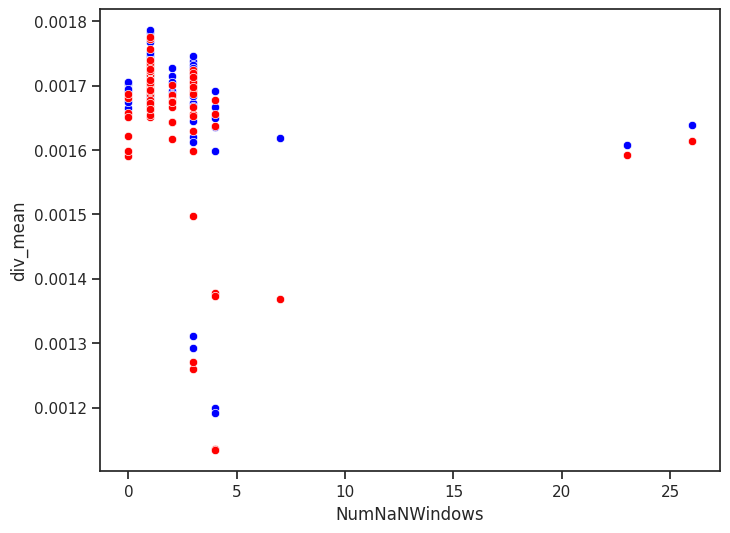

In [32]:
# what is the impact of the number of windows that we have to ignore?

fig2, ax2 = plt.subplots(figsize=(8,6))
sns.scatterplot(overview, x="NumNaNWindows",y="div_mean", ax=ax2, color="blue")
sns.scatterplot(overview, x="NumNaNWindows",y="divWeight_mean", ax=ax2, color="red")

print((np.array(overview["div_mean"].values) - np.array(overview["divWeight_mean"].values)) < 0)
print((np.array(overview["div_mean"].values) - np.array(overview["divWeight_mean"].values)))

array([[ 1.        , -0.08166447],
       [-0.08166447,  1.        ]])

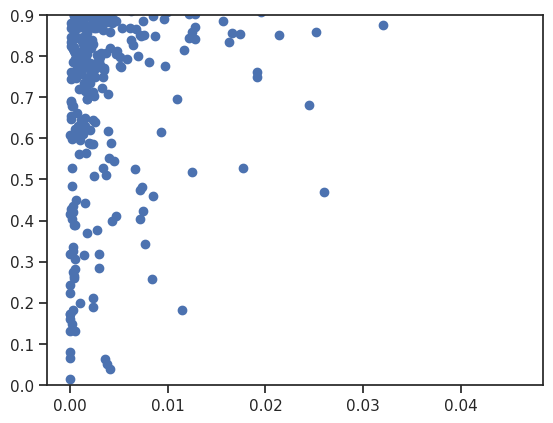

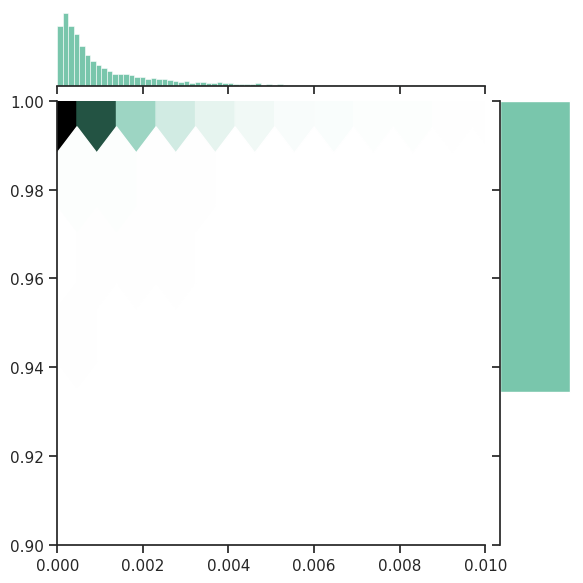

In [34]:

plt.scatter(df_shiftRaw["div_Gent_bb_1_1"].values,df_shiftRaw["frac_Gent_bb_1_1"].values)
plt.ylim([0, 0.9])
#plt.xlim([0, 0.01])
#plt.ylim([0.9, 1])
mask = ~np.isnan(df_shiftRaw["div_Gent_bb_1_1"].values)
x = df_shiftRaw["div_Gent_bb_1_1"].values[mask]
y = df_shiftRaw["frac_Gent_bb_1_1"].values[mask]
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391", xlim=[0,0.01], ylim=[0.9, 1])#, xscale="log")
np.corrcoef(x, y)

In [8]:
n = len(df_shiftRaw["frac_Gent_bb_1_1"].values)
C_f = np.linalg.norm(df_shiftRaw["frac_Gent_bb_1_1"].values, ord=1) / np.linalg.norm(df_shiftRaw["frac_Gent_bb_1_1"].values, ord=2)
print(C_f)
no_nans = df_shiftRaw["div_Gent_bb_1_1"].values[~np.isnan(df_shiftRaw["div_Gent_bb_1_1"].values)]
C_p = np.linalg.norm(no_nans, ord=1) / np.linalg.norm(no_nans, ord=2)
print(C_p)
print(C_f * C_p / n)
print(np.arccos(C_f * C_p / n))

99.84599358852101
47.116894498213426
0.4689426979644775
1.0827030173787957


(0.0, 10000000.0)

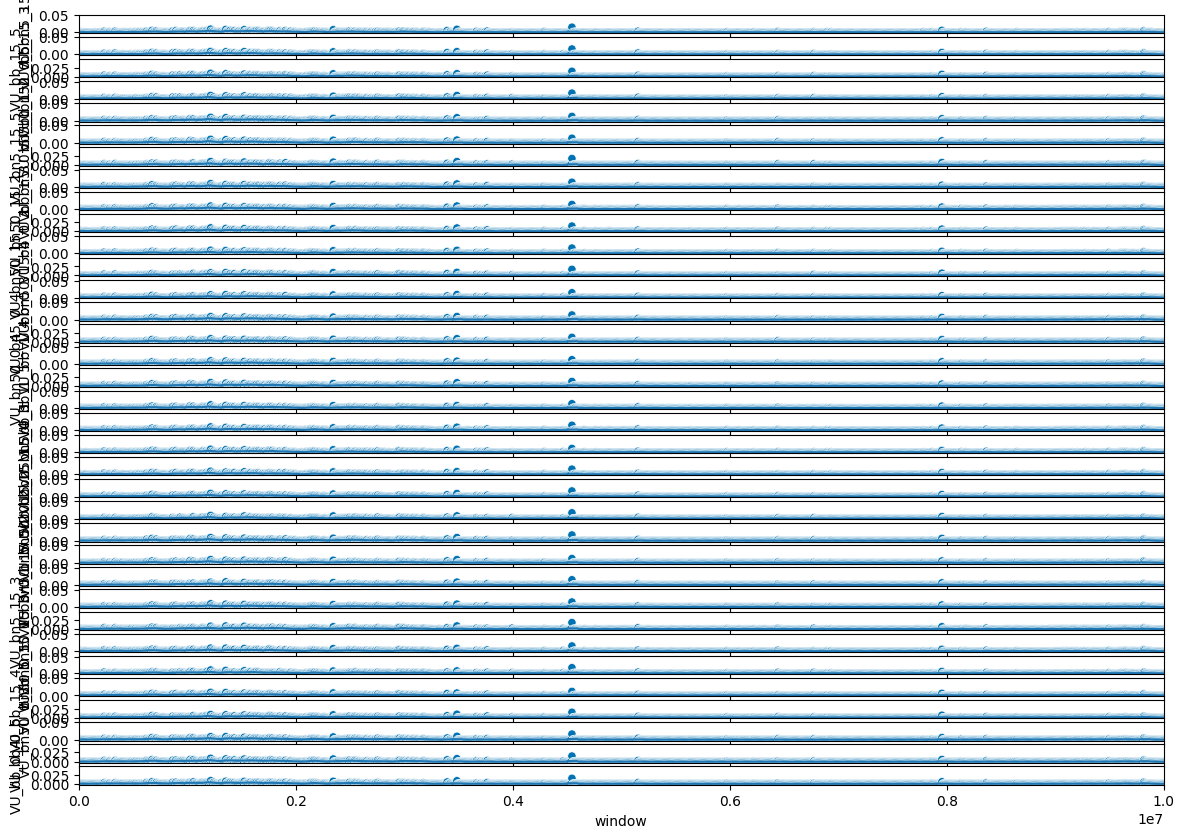

In [21]:
## this is just here for check reasons:
### -- to see if we have data for the whole genome

samName_plot = [s for s in samName_collect if "bb" and ("15") and ("VU") in s]

f1, axx = plt.subplots(len(samName_plot),1, sharex='col', figsize=(14, 10))#, sharex=True)
windowSize=10

for i in range(len(samName_plot)):
    plot = sns.scatterplot(ax=axx[i], data=df_shiftNorm, x='window', y="divNorm"+"_"+samName_plot[i], 
                   hue='chr', palette = 'colorblind', legend=None) 
    axx[i].set_ylabel(samName_plot[i])
    movmean = moving_average(df_shiftNorm["divNorm"+"_"+samName_plot[i]], windowSize)
    axx[i].plot(np.array(df_shiftNorm['window'].values),movmean)

plt.xlim([0,10000000])

In [39]:
# only look at backbone
overviewBB = overview.loc[(overview['treatment']=="bb") | (overview['treatment']=="anc")]
overviewnotBB = overview.loc[(overview['treatment']!="bb") | (overview['treatment']=="anc")]
overviewW0 = overview.loc[(overview['week']==0)]
overviewW1 = overview.loc[(overview['week']==1)]
overviewW15 = overview.loc[(overview['week']==15)]

[Text(0.5, 0, '')]

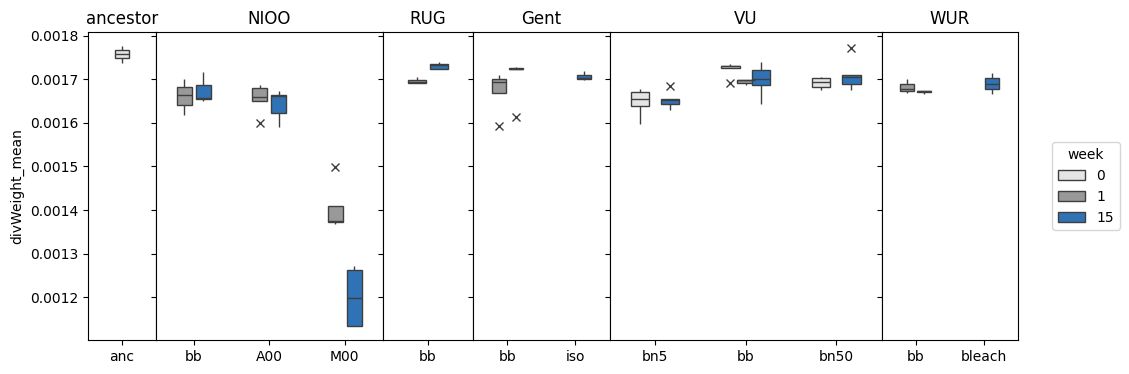

In [28]:
fig2, ax2 = plt.subplots(1,6,figsize=(12,4), sharey=True,gridspec_kw={'width_ratios': [3, 10, 4, 6, 12, 6]})
plt.subplots_adjust(wspace=0, hspace=0)

sns.boxplot(data=overview[(overview["week"]==0) & (overview["institution"]=="UVA") & (overview["treatment"]=="anc")], x="treatment",
            y="divWeight_mean", widths=0.2, hue="week", ax=ax2[0], legend=None, palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=overview[overview["institution"]=="NIOO"], x="treatment", y="divWeight_mean", widths=0.2, hue="week", width=0.5, ax=ax2[1], legend=None,
           palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=overview[overview["institution"]=="RUG"], x="treatment", y="divWeight_mean", widths=0.2,hue="week", width=0.5, ax=ax2[2], legend=None,
           palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=overview[overview["institution"]=="Gent"], x="treatment", y="divWeight_mean", widths=0.2,hue="week", width=0.5, ax=ax2[3], legend=None,
            palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=overview[overview["institution"]=="VU"], x="treatment", y="divWeight_mean", widths=0.2,hue="week", width=0.5, ax=ax2[4],
            palette=my_colors, showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=overview[overview["institution"]=="WUR"], x="treatment", y="divWeight_mean", widths=0.2,hue="week", width=0.5, ax=ax2[5], legend=None,
            palette=my_colors, showcaps=False, flierprops={"marker": "x"})

sns.move_legend(ax2[4], "center right", ncol=1, bbox_to_anchor=(1.9, 0.5))
sns.set_theme(style="ticks")
ax2[0].title.set_text('ancestor')
ax2[1].title.set_text('NIOO')
ax2[2].title.set_text('RUG')
ax2[3].title.set_text('Gent')
ax2[4].title.set_text('VU')
ax2[5].title.set_text('WUR')

ax2[0].set(xlabel='')
ax2[1].set(xlabel='')
ax2[2].set(xlabel='')
ax2[3].set(xlabel='')
ax2[4].set(xlabel='')
ax2[5].set(xlabel='')

#fig2.savefig(outPlots + "Pi_Grenedalf_default_validLoci.png", 
#             dpi=300, bbox_inches='tight')

In [29]:
### save the data:
df_shiftRaw.to_pickle(outPath + "PiDiv_df_shiftRaw_singleData_20241028.pkl")
df_shiftRaw.to_csv(outPath + "PiDiv_df_shiftRaw_singleData_20241028.csv", index=False)

df_shiftNorm.to_pickle(outPath + "PiDiv_df_shiftNorm_singleData_20241028.pkl")
df_shiftNorm.to_csv(outPath + "PiDiv_df_shiftNorm_singleData_20241028.csv", index=False)

overview.to_pickle(outPath + "PiDiv_df_overview_singleData_20241028.pkl")
overview.to_csv(outPath + "PiDiv_df_overview_singleData_20241028.csv", index=False)
